## Day 25 - Messy wires

**Part 1: Find the three wire connections that can be removed to split the network into exactly two groups**

In [42]:
with open("example.txt") as f:
    example_lines = [line.strip() for line in f.readlines()]

with open("input.txt") as f:
    input_lines = [line.strip() for line in f.readlines()]

example_lines

['jqt: rhn xhk nvd',
 'rsh: frs pzl lsr',
 'xhk: hfx',
 'cmg: qnr nvd lhk bvb',
 'rhn: xhk bvb hfx',
 'bvb: xhk hfx',
 'pzl: lsr hfx nvd',
 'qnr: nvd',
 'ntq: jqt hfx bvb xhk',
 'nvd: lhk',
 'lsr: lhk',
 'rzs: qnr cmg lsr rsh',
 'frs: qnr lhk lsr']

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

def visualise_part1(lines: list[str], large=False):
    g = nx.Graph()
    for line in lines:
        lhs, rhs = line.split(": ")
        for connection in rhs.split():
            g.add_edge(lhs, connection)

    plt.figure(1, figsize=(100,100) if large else (12,12))
    nx.draw(g, with_labels = True, node_size=60, font_size=14)

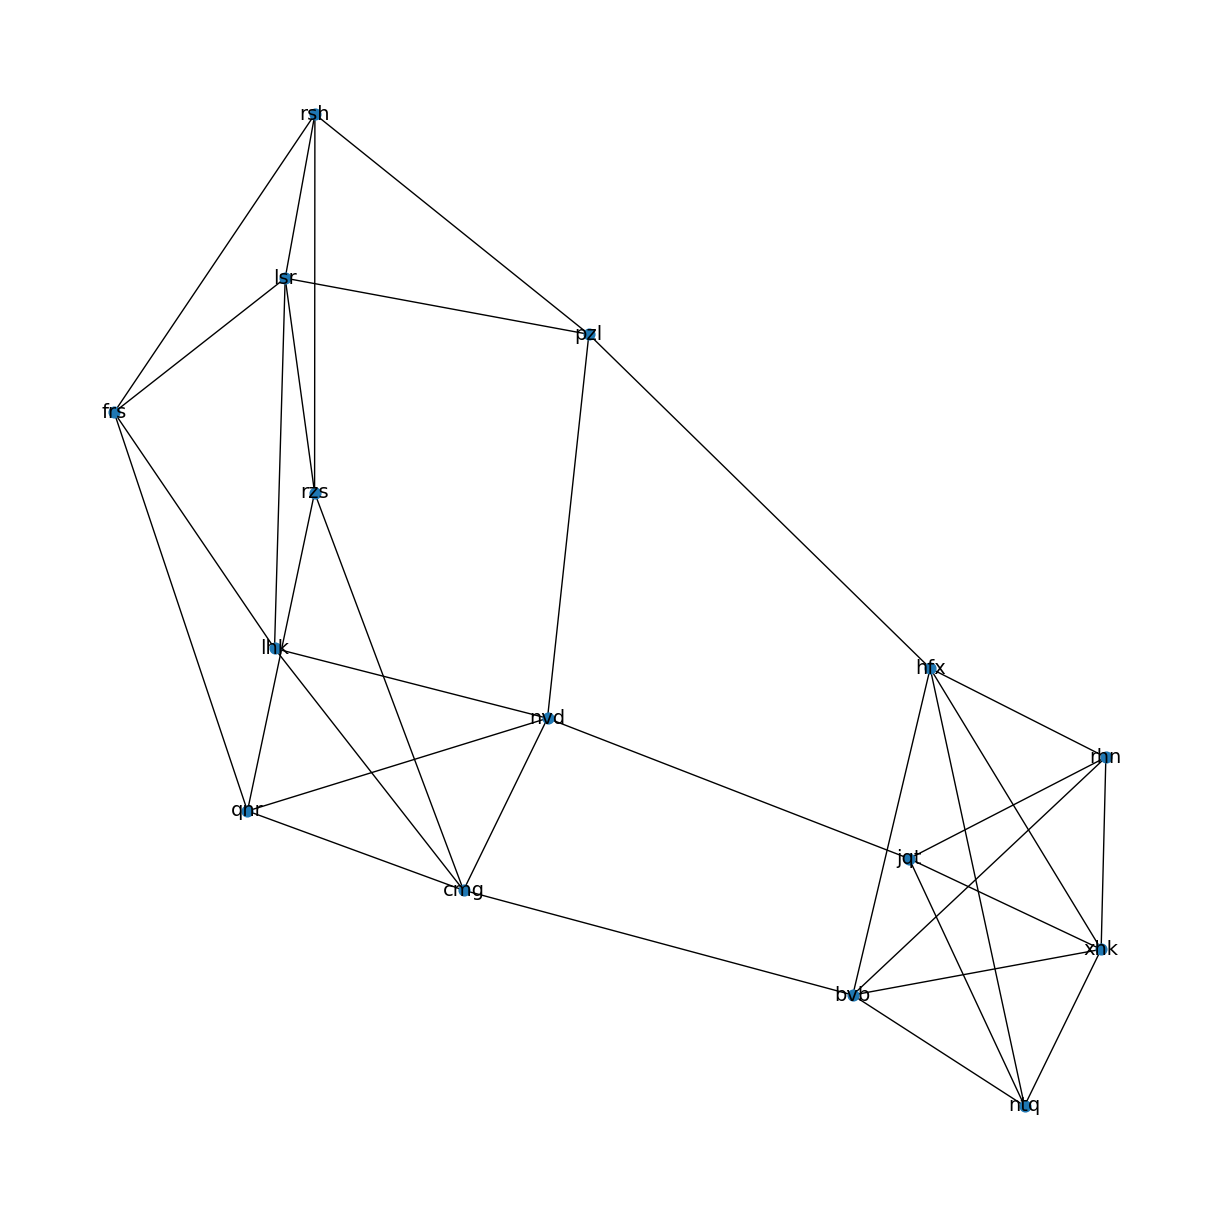

In [47]:
%matplotlib inline
visualise_part1(example_lines)

In [49]:
%matplotlib qt
visualise_part1(input_lines, large=True)

Visually we see we want to cut off the connection between:
- zdj/nvt,
- cth/xxk
- mzg/bbm

In [46]:
def part1() -> int:
    g = nx.Graph()
    for line in input_lines:
        lhs, rhs = line.split(": ")
        for connection in rhs.split():
            g.add_edge(lhs, connection)

    g.remove_edge("zdj", "nvt")
    g.remove_edge("cth", "xxk")
    g.remove_edge("mzg", "bbm")

    sub_graphs = [sub for sub in nx.connected_components(g)]
    assert len(sub_graphs) == 2
    return len(sub_graphs[0]) * len(sub_graphs[1])

part1()

601344